In [153]:
#Chloe Cheng (1003254818)

#Import required modules
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u

fs=16
plt.rc('font', family='serif',size=fs)

%matplotlib inline

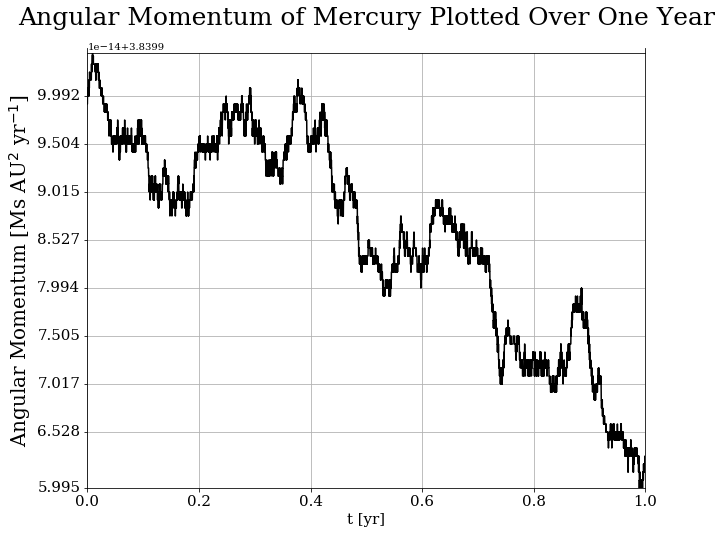

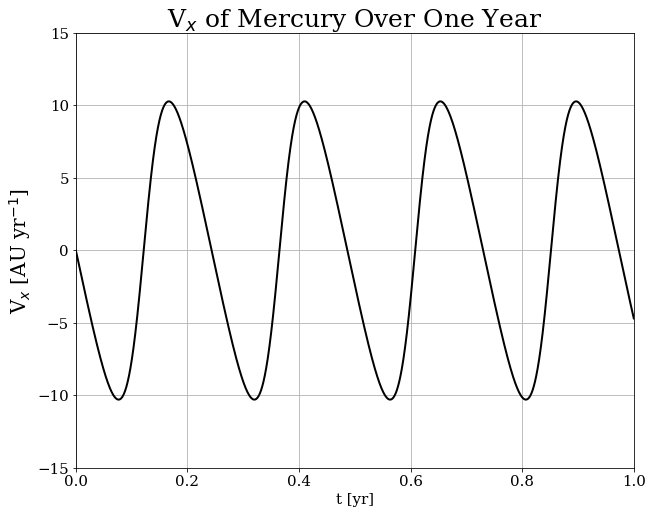

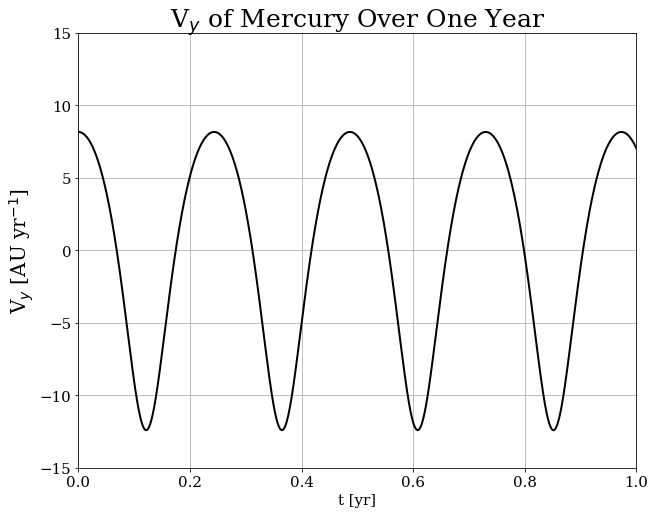

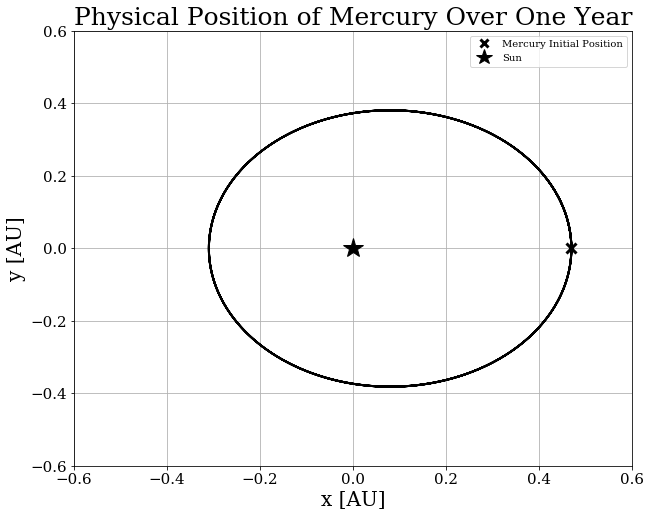

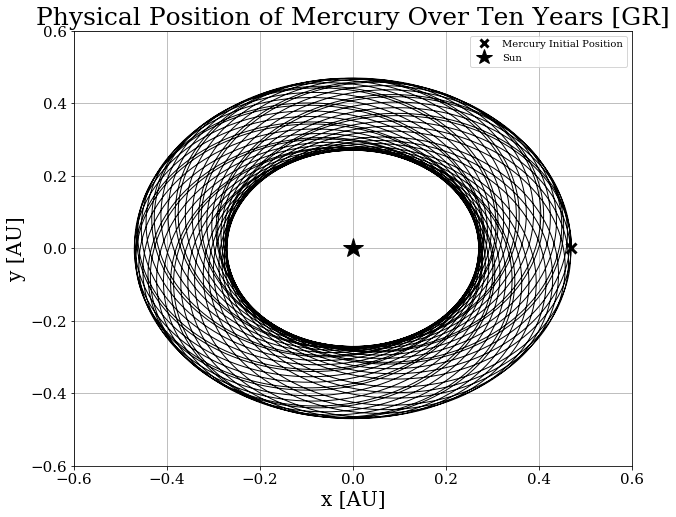

In [154]:
#In Lab 1, Problem 1, we solved the equations of motion for a 2-body problem using the Euler-Cromer method
#Defining constants
G = 39.5                        #AU^3 Ms^-1 yr^-2
alpha = 0.01                    #AU^2

#Defining initial conditions for Mercury
x0 = 0.47                       # AU, initial x-position
y0 = 0.00                       # AU, initial y-position
vx0 = 0.00                      # AU/yr, initial x-velocity
vy0 = 8.17                      # AU/yr, initial y-velocity
dt = 0.0001                     # yr, time-step
t = np.arange(0.0, 1.0, dt)     # yr, integration time
npts = len(t)                   # number of points

#Set up numerical integration with placeholder arrays
xn = np.zeros(npts)
yn = np.zeros(npts)
vxn = np.zeros(npts)
vyn = np.zeros(npts)
xn[0] = x0
yn[0] = y0
vxn[0] = vx0
vyn[0] = vy0

#Using a recursion scheme to numerically integrate the orbit (Euler-Cromer method)
for i in range(1, npts):
    vxn[i] = vxn[i-1] - ((G*xn[i-1]*dt)/(((xn[i-1]**2 + yn[i-1]**2)**(1/2))**3))
    vyn[i] = vyn[i-1] - ((G*yn[i-1]*dt)/(((xn[i-1]**2 + yn[i-1]**2)**(1/2))**3))
    xn[i] = xn[i-1] + vxn[i]*dt
    yn[i] = yn[i-1] + vyn[i]*dt

#Computing angular momentum
ang_mom = (xn*vyn) - (yn*vxn)

#Plotting angular momentum over time
plt.figure(figsize=(10,8))
plt.title('Angular Momentum of Mercury Plotted Over One Year', y=1.05, fontsize=25)
plt.xlabel('t [yr]', fontsize=15)
plt.ylabel('Angular Momentum [Ms AU$^{2}$ yr$^{-1}$]', fontsize=20)
plt.plot(t, ang_mom, 'k-')
plt.xlim(0,1)
plt.ylim(np.min(ang_mom), np.max(ang_mom))
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('Q1_angmomentum.pdf', bbox_inches='tight')
plt.show()

#Plotting vx over one year
plt.figure(figsize=(10,8))
plt.title('V$_x$ of Mercury Over One Year', fontsize=25)
plt.xlabel('t [yr]', fontsize=15)
plt.ylabel('V$_x$ [AU yr$^{-1}$]', fontsize=20)
plt.xlim(0, 1)
plt.ylim(-15, 15)
plt.plot(t,vxn, 'k-', linewidth=2)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('Q1_vx_1year.pdf', bbox_inches='tight')
plt.show()

#Plotting vy over one year
plt.figure(figsize=(10,8))
plt.title('V$_y$ of Mercury Over One Year', fontsize=25)
plt.xlabel('t [yr]', fontsize=15)
plt.ylabel('V$_y$ [AU yr$^{-1}$]', fontsize=20)
plt.xlim(0, 1)
plt.ylim(-15, 15)
plt.plot(t,vyn, 'k-', linewidth=2)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('Q1_vy_1year.pdf', bbox_inches='tight')
plt.show()

#Plotting the position of Mercury over one year
plt.figure(figsize=(10,8))
plt.title('Physical Position of Mercury Over One Year', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.xlim(-0.6, 0.6)
plt.ylim(-0.6, 0.6)
plt.plot(xn, yn, 'k-', linewidth=2)
plt.plot(x0, y0, 'kx', markeredgewidth=3, markersize=10, label='Mercury Initial Position')
plt.plot(0, 0, 'k*', markeredgewidth=1, markersize=20, label='Sun')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(markerscale=0.8)
plt.savefig('Q1_orbit_1year.pdf', bbox_inches='tight')
plt.show()

#REDO WITH GR EQUATION (ADD THE ALPHA TERM)

#Changing integration time to 10 years to see multiple orbits
t2 = np.arange(0.0, 10.0, dt)     # yr, integration time
npts2 = len(t2)                   # number of points

#Setting up numerical integration with intial conditions
xn2 = np.zeros(npts2)
yn2 = np.zeros(npts2)
vxn2 = np.zeros(npts2)
vyn2 = np.zeros(npts2)
xn2[0] = x0
yn2[0] = y0
vxn2[0] = vx0
vyn2[0] = vy0

#Using a recursion scheme to numerically integrate the orbit (with alpha term)
for i in range(1, npts2):
    vxn2[i] = vxn2[i-1] - (((G*xn2[i-1]*dt)/(((xn2[i-1]**2 + yn2[i-1]**2)**(1/2))**3))*(1 + (alpha/(((xn2[i-1]**2 + yn2[i-1]**2)**(1/2))**2))))
    vyn2[i] = vyn2[i-1] - (((G*yn2[i-1]*dt)/(((xn2[i-1]**2 + yn2[i-1]**2)**(1/2))**3))*(1 + (alpha/(((xn2[i-1]**2 + yn2[i-1]**2)**(1/2))**2))))
    xn2[i] = xn2[i-1] + vxn2[i]*dt
    yn2[i] = yn2[i-1] + vyn2[i]*dt
    
#Plotting the position of Mercury over 10 years with the GR equation
plt.figure(figsize=(10,8))
plt.title('Physical Position of Mercury Over Ten Years [GR]', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.xlim(-0.6, 0.6)
plt.ylim(-0.6, 0.6)
plt.plot(xn2, yn2, 'k-', linewidth=1)
plt.plot(x0, y0, 'kx', markeredgewidth=3, markersize=10, label='Mercury Initial Position')
plt.plot(0, 0, 'k*', markeredgewidth=1, markersize=20, label='Sun')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(markerscale=0.8)
plt.savefig('Q1_grorbit_10years.pdf', bbox_inches='tight')
plt.show()

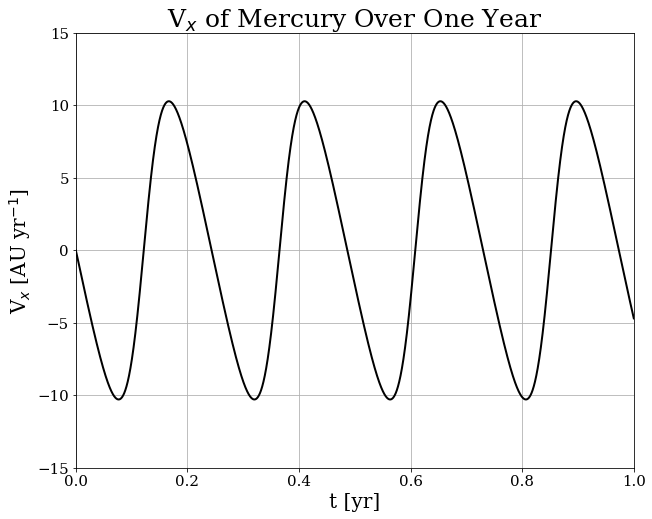

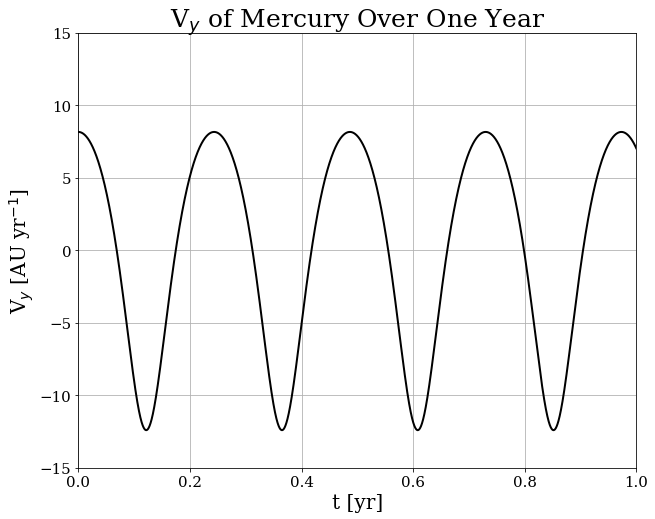

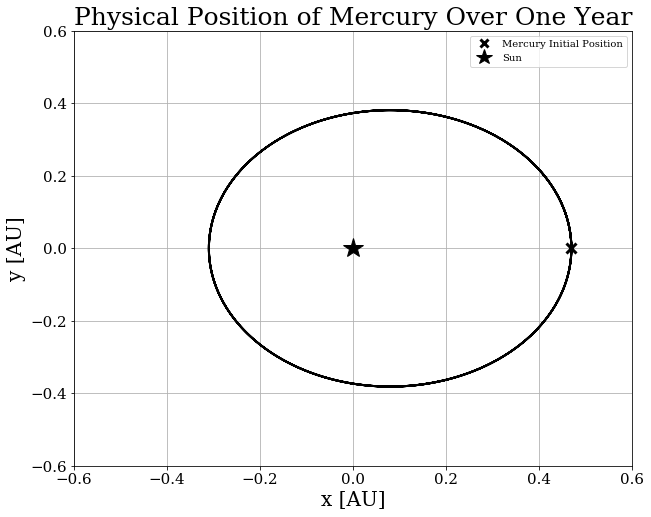

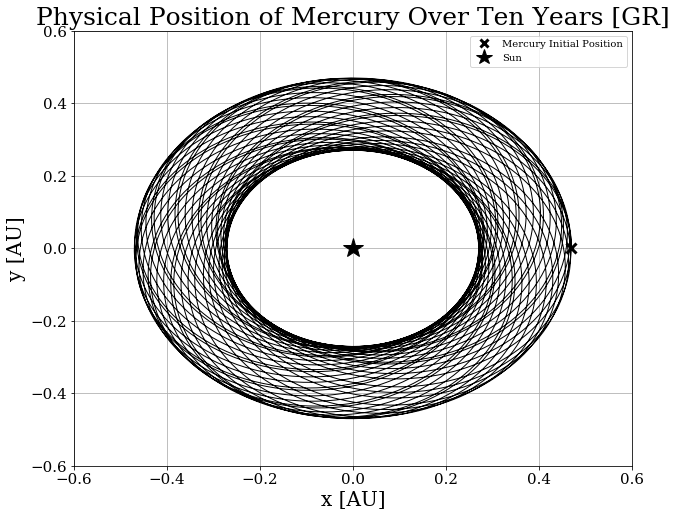

In [155]:
#We can also solve this problem using RK4, as in Lab 6
#Defining a function for RK4 integration using code modified from Newman (2013)
def RK4(a, b, N, f, x_init, vx_init, y_init, vy_init, const=False): 
    h = (b - a)/N                         #Step size
    tpoints = np.arange(a, b, h)          #Time array
    xpoints = []                          #Empty list to set up x
    vxpoints = []
    ypoints = []                          #Empty list to set up y
    vypoints = []
    r = np.array([x_init, vx_init, y_init, vy_init], float) #Initial conditions array
    
    #If there are no additional arguments in the function to be integrated:
    if const==False: 
        for t in tpoints:
            xpoints.append(r[0])
            vxpoints.append(r[1])
            ypoints.append(r[2])
            vypoints.append(r[3])
            
            #RK4 equations
            k1 = h*f(r,t)
            k2 = h*f(r+0.5*k1, t+0.5*h)
            k3 = h*f(r+0.5*k2, t+0.5*h)
            k4 = h*f(r+k3, t+h)
            r += (k1 + 2*k2 + 2*k3 + k4)/6
        
        return np.array(tpoints, float), np.array(xpoints, float), np.array(vxpoints, float), np.array(ypoints, float), np.array(vypoints, float)
    
    #If there are additional arguments in the function to be integrated:
    else:
        for t in tpoints:
            xpoints.append(r[0])
            vxpoints.append(r[1])
            ypoints.append(r[2])
            vypoints.append(r[3])
            
            #RK4 equations
            k1 = h*f(r,t, const)
            k2 = h*f(r+0.5*k1, t+0.5*h, const)
            k3 = h*f(r+0.5*k2, t+0.5*h, const)
            k4 = h*f(r+k3, t+h, const)
            r += (k1 + 2*k2 + 2*k3 + k4)/6
            
        return np.array(tpoints, float), np.array(xpoints, float), np.array(vxpoints, float), np.array(ypoints, float), np.array(vypoints, float)

M_sun = 1 #Mass of the sun [solar masses]
    
#Define the equations of motion for a 2-body orbit 
def two_body(r,t): 
    #Initial conditions
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    d = np.sqrt(x**2 + y**2) #Distance
    
    #Equations of motion
    fx = vx
    fvx = -(G*M_sun*x)/(d**3)
    fy = vy
    fvy = -(G*M_sun*y)/(d**3)
    return np.array([fx, fvx, fy, fvy], float)

#Define parameters and constants for the integration
a = 0          #Initial time
b = 1          #Final time [years]
dt = 0.0001    #Timestep 
N = (b-a)/dt   #Total number of steps
x0 = 0.47      #Initial x-position of Mercury 
y0 = 0         #Initial y-position of Mercury
vx0 = 0        #Initial x-velocity of Mercury
vy0 = 8.17     #Initial y-velocity of Mercury

#Integrate the equations of motion using RK4
t_2body, x_2body, vx_2body, y_2body, vy_2body = RK4(a, b, N, two_body, x0, vx0, y0, vy0)

#Plotting vx over one year
plt.figure(figsize=(10,8))
plt.title('V$_x$ of Mercury Over One Year', fontsize=25)
plt.xlabel('t [yr]', fontsize=20)
plt.ylabel('V$_x$ [AU yr$^{-1}$]', fontsize=20)
plt.xlim(0, 1)
plt.ylim(-15, 15)
plt.plot(t_2body,vx_2body, 'k-', linewidth=2)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('mercury_vx_1yr_rk4.pdf', bbox_inches='tight')
plt.show()

#Plotting vy over one year
plt.figure(figsize=(10,8))
plt.title('V$_y$ of Mercury Over One Year', fontsize=25)
plt.xlabel('t [yr]', fontsize=20)
plt.ylabel('V$_y$ [AU yr$^{-1}$]', fontsize=20)
plt.xlim(0, 1)
plt.ylim(-15, 15)
plt.plot(t_2body,vy_2body, 'k-', linewidth=2)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('mercury_vy_1yr_rk4.pdf', bbox_inches='tight')
plt.show()

#Plotting the position of Mercury over one year
plt.figure(figsize=(10,8))
plt.title('Physical Position of Mercury Over One Year', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.xlim(-0.6, 0.6)
plt.ylim(-0.6, 0.6)
plt.plot(x_2body, y_2body, 'k-', linewidth=2)
plt.plot(x0, y0, 'kx', markeredgewidth=3, markersize=10, label='Mercury Initial Position')
plt.plot(0, 0, 'k*', markeredgewidth=1, markersize=20, label='Sun')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(markerscale=0.8)
plt.savefig('mercury_position_rk4.pdf', bbox_inches='tight')
plt.show()

#Add GR term to the two-body orbit equations of motion
def two_body_GR(r,t): 
    #Initial conditions
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    d = np.sqrt(x**2 + y**2) #Distance
    
    #Equations of motion
    fx = vx
    fvx = -((G*M_sun*x)/(d**3))*(1 + (alpha/(d**2)))
    fy = vy
    fvy = -((G*M_sun*y)/(d**3))*(1 + (alpha/(d**2)))
    return np.array([fx, fvx, fy, fvy], float)

#Define parameters and constants for the integration
a_GR = 0         #Initial time
b_GR = 10        #Final time [years]
dt = 0.0001      #Timestep
N_GR = (b-a)/dt  #Number of timesteps

#Integrate the equations of motion using RK4
t_2body_GR, x_2body_GR, vx_2body_GR, y_2body_GR, vy_2body_GR = RK4(a_GR, b_GR, N_GR, two_body_GR, x0, vx0, y0, vy0)

#Plotting the position of Mercury over 10 years with the GR equation
plt.figure(figsize=(10,8))
plt.title('Physical Position of Mercury Over Ten Years [GR]', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.xlim(-0.6, 0.6)
plt.ylim(-0.6, 0.6)
plt.plot(x_2body_GR, y_2body_GR, 'k-', linewidth=1)
plt.plot(x0, y0, 'kx', markeredgewidth=3, markersize=10, label='Mercury Initial Position')
plt.plot(0, 0, 'k*', markeredgewidth=1, markersize=20, label='Sun')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(markerscale=0.8)
plt.savefig('mercury_gr_rk4.pdf', bbox_inches='tight')
plt.show()

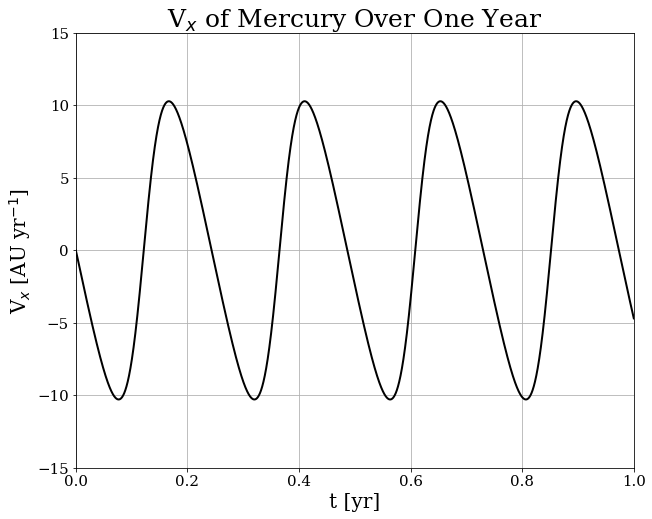

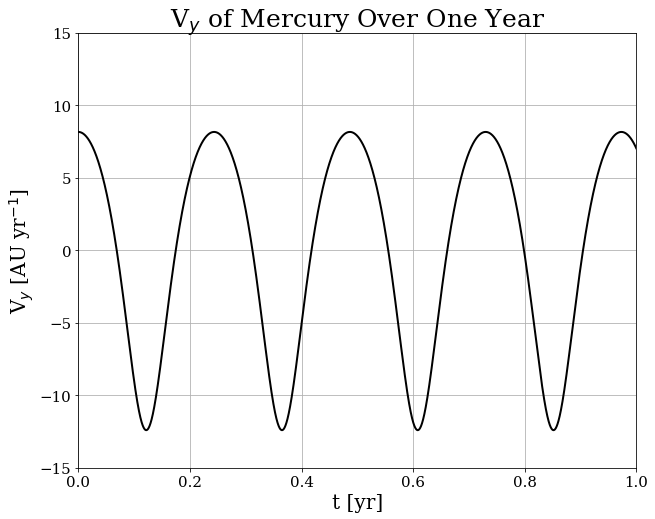

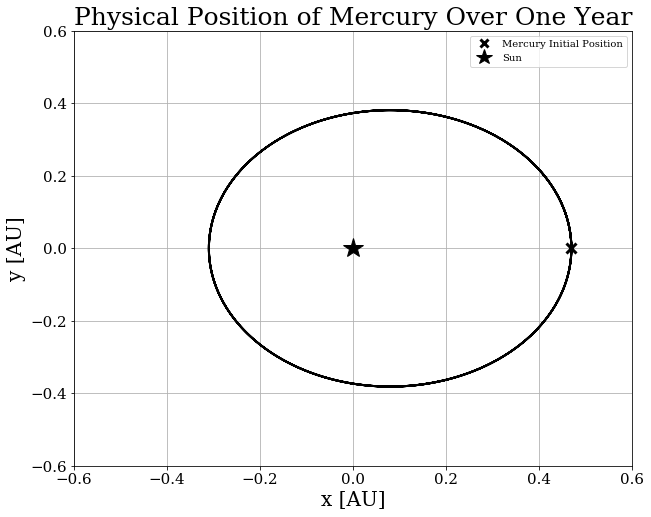

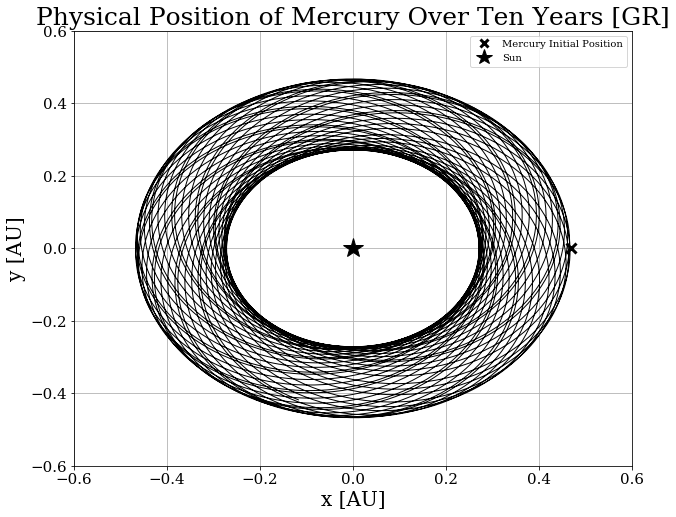

In [156]:
#Generalize the RK4 integrator to take any number of coupled differential equations
def RK4_array(a, b, N, f, r): 
    h = (b - a)/N                               #Step size
    tpoints = np.arange(a, b, h)                #Time array
    x = np.zeros((int(N), len(f(r,tpoints))))   #Initial conditions
 
    for t, i in zip(tpoints, range(int(N))):
        x[i,:] = r
        #RK4 equations
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1, t+0.5*h)
        k3 = h*f(r+0.5*k2, t+0.5*h)
        k4 = h*f(r+k3, t+h)
        r += (k1 + 2*k2 + 2*k3 + k4)/6
        
    return np.array(tpoints, float), x
    
    
ics = np.array([x0, vx0, y0, vy0])   #Make an array for initial conditions

#Integrate the equations of motion using general RK4
t_2body_arr, x_2body_arr = RK4_array(a, b, N, two_body, ics)                     #Classical
t_2body_arr_GR, x_2body_arr_GR = RK4_array(a_GR, b_GR, N_GR, two_body_GR, ics)   #GR

#Plotting vx over one year
plt.figure(figsize=(10,8))
plt.title('V$_x$ of Mercury Over One Year', fontsize=25)
plt.xlabel('t [yr]', fontsize=20)
plt.ylabel('V$_x$ [AU yr$^{-1}$]', fontsize=20)
plt.xlim(0, 1)
plt.ylim(-15, 15)
plt.plot(t_2body_arr,x_2body_arr[:,1], 'k-', linewidth=2)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('mercury_vx_1yr_rk4array.pdf', bbox_inches='tight')
plt.show()

#Plotting vy over one year
plt.figure(figsize=(10,8))
plt.title('V$_y$ of Mercury Over One Year', fontsize=25)
plt.xlabel('t [yr]', fontsize=20)
plt.ylabel('V$_y$ [AU yr$^{-1}$]', fontsize=20)
plt.xlim(0, 1)
plt.ylim(-15, 15)
plt.plot(t_2body_arr,x_2body_arr[:,3], 'k-', linewidth=2)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('mercury_vy_1yr_rk4array.pdf', bbox_inches='tight')
plt.show()

#Plotting the position of Mercury over one year
plt.figure(figsize=(10,8))
plt.title('Physical Position of Mercury Over One Year', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.xlim(-0.6, 0.6)
plt.ylim(-0.6, 0.6)
plt.plot(x_2body_arr[:,0], x_2body_arr[:,2], 'k-', linewidth=2)
plt.plot(x0, y0, 'kx', markeredgewidth=3, markersize=10, label='Mercury Initial Position')
plt.plot(0, 0, 'k*', markeredgewidth=1, markersize=20, label='Sun')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(markerscale=0.8)
plt.savefig('mercury_position_rk4array.pdf', bbox_inches='tight')
plt.show()

#Plotting the position of Mercury over 10 years with the GR equation
plt.figure(figsize=(10,8))
plt.title('Physical Position of Mercury Over Ten Years [GR]', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.xlim(-0.6, 0.6)
plt.ylim(-0.6, 0.6)
plt.plot(x_2body_arr_GR[:,0], x_2body_arr_GR[:,2], 'k-', linewidth=1)
plt.plot(x0, y0, 'kx', markeredgewidth=3, markersize=10, label='Mercury Initial Position')
plt.plot(0, 0, 'k*', markeredgewidth=1, markersize=20, label='Sun')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(markerscale=0.8)
plt.savefig('mercury_gr_rk4array.pdf', bbox_inches='tight')
plt.show()

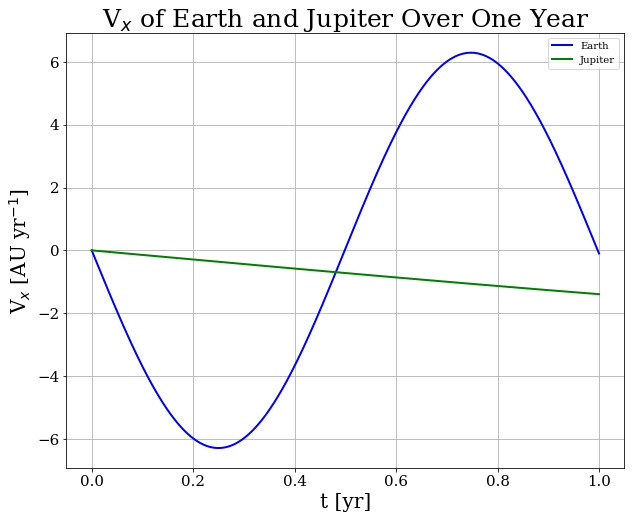

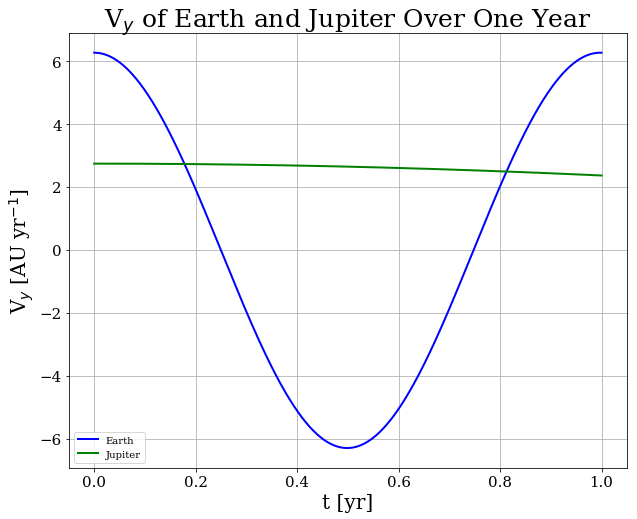

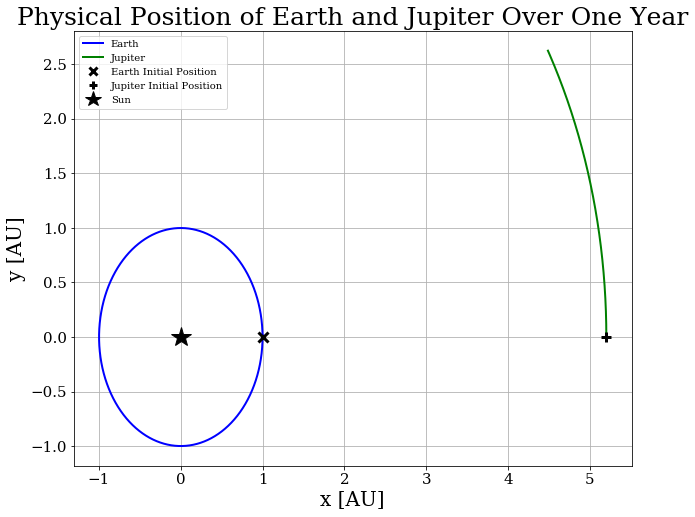

In [174]:
#Orbit of 2 planets (Earth and Jupiter) around the Sun with inspiration from Zaman 2018
#Define a function for the equations of motion of two bodies orbiting around the Sun
def two_planets(r,t): 
    #Initial conditions
    x1 = r[0]
    vx1 = r[1]
    y1 = r[2]
    vy1 = r[3]
    x2 = r[4]
    vx2 = r[5]
    y2 = r[6]
    vy2 = r[7]
    
    #Semi-major axes
    d1 = np.sqrt(x1**2 + y1**2)
    d2 = np.sqrt(x2**2 + y2**2)
    
    #Equations of motion
    fx1 = vx1
    fvx1 = -(G*M_sun*x1)/(d1**3)
    fy1 = vy1
    fvy1 = -(G*M_sun*y1)/(d1**3)
    fx2 = vx2
    fvx2 = -(G*M_sun*x2)/(d2**3)
    fy2 = vy2
    fvy2 = -(G*M_sun*y2)/(d2**3)
    return np.array([fx1, fvx1, fy1, fvy1, fx2, fvx2, fy2, fvy2], float)

#Define initial conditions
earth_x0 = 1
earth_y0 = 0
earth_vx0 = 0
earth_vy0 = 6.28
jupiter_x0 = 5.2
jupiter_y0 = 0
jupiter_vx0 = 0
jupiter_vy0 = 2.75

#Put initial conditions into an array
two_planet_ics = np.array((earth_x0, earth_vx0, earth_y0, earth_vy0, jupiter_x0, jupiter_vx0, jupiter_y0, jupiter_vy0))

#Integrate the equations of motion using RK4
t_2planet, x_2planet = RK4_array(a, b, N, two_planets, two_planet_ics)

#Plotting vx over one year
plt.figure(figsize=(10,8))
plt.title('V$_x$ of Earth and Jupiter Over One Year', fontsize=25)
plt.xlabel('t [yr]', fontsize=20)
plt.ylabel('V$_x$ [AU yr$^{-1}$]', fontsize=20)
plt.plot(t_2planet,x_2planet[:,1], 'b-', linewidth=2, label='Earth')
plt.plot(t_2planet, x_2planet[:,5], 'g-', linewidth=2, label='Jupiter')
plt.grid()
plt.legend(markerscale=0.8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('ej_vx_1yr.pdf', bbox_inches='tight')
plt.show()

#Plotting vy over one year
plt.figure(figsize=(10,8))
plt.title('V$_y$ of Earth and Jupiter Over One Year', fontsize=25)
plt.xlabel('t [yr]', fontsize=20)
plt.ylabel('V$_y$ [AU yr$^{-1}$]', fontsize=20)
plt.plot(t_2planet,x_2planet[:,3], 'b-', linewidth=2, label='Earth')
plt.plot(t_2planet, x_2planet[:,7], 'g-', linewidth=2, label='Jupiter')
plt.grid()
plt.legend(markerscale=0.8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('ej_vy_1yr.pdf', bbox_inches='tight')
plt.show()

#Plotting the position of Earth and Jupiter over one year
plt.figure(figsize=(10,8))
plt.title('Physical Position of Earth and Jupiter Over One Year', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.plot(x_2planet[:,0], x_2planet[:,2], 'b-', linewidth=2, label='Earth')
plt.plot(x_2planet[:,4], x_2planet[:,6], 'g-', linewidth=2, label='Jupiter')
plt.plot(earth_x0, earth_y0, 'kx', markeredgewidth=3, markersize=10, label='Earth Initial Position')
plt.plot(jupiter_x0, jupiter_y0, 'k+', markeredgewidth=3, markersize=10, label='Jupiter Initial Position')
plt.plot(0, 0, 'k*', markeredgewidth=1, markersize=20, label='Sun')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(markerscale=0.8)
plt.savefig('ej_pos_1yr.pdf', bbox_inches='tight')
plt.show()

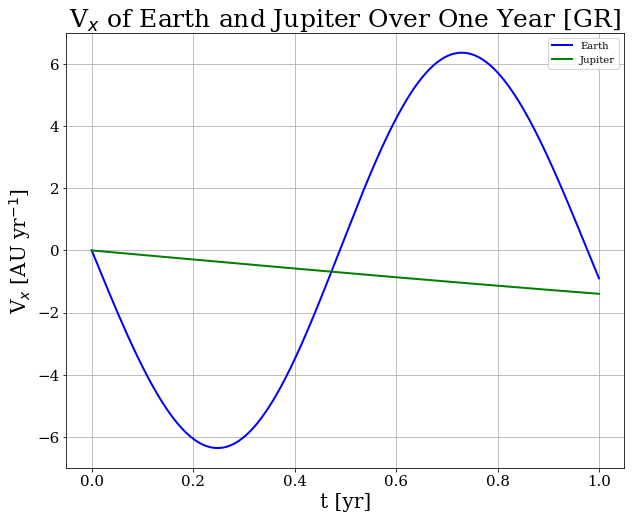

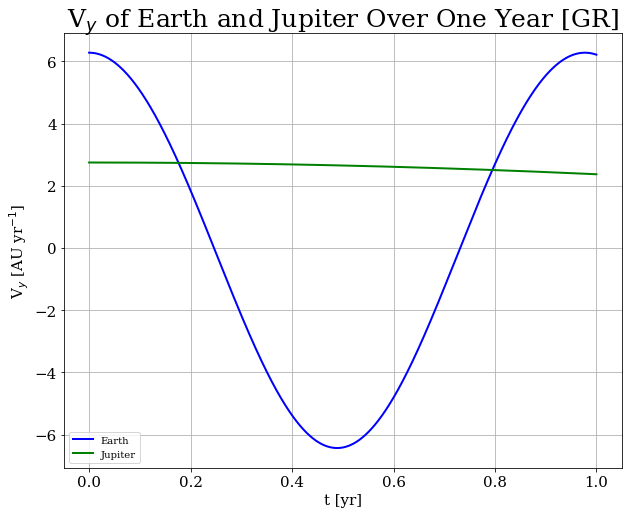

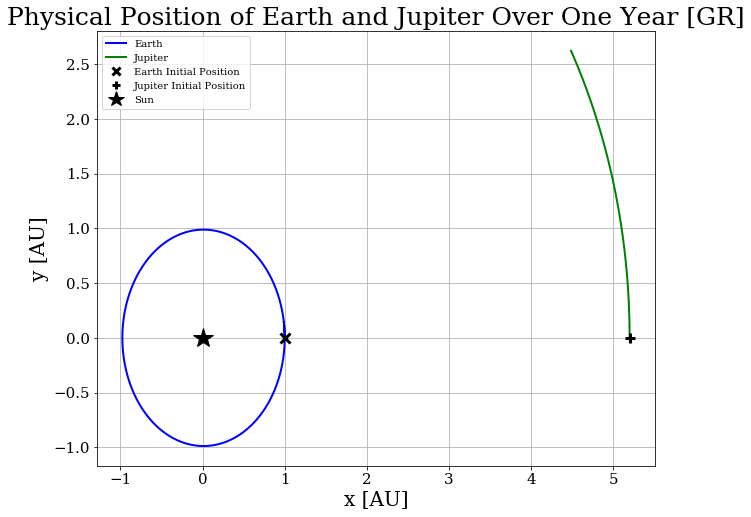

In [199]:
#Orbit of Earth and Jupiter around the Sun including GR
#Write a function for the equations of motion
def two_planets_GR1(r,t): 
    #Initial conditions
    x1 = r[0]
    vx1 = r[1]
    y1 = r[2]
    vy1 = r[3]
    x2 = r[4]
    vx2 = r[5]
    y2 = r[6]
    vy2 = r[7]
    
    #Semi-major axes
    d1 = np.sqrt(x1**2 + y1**2)
    d2 = np.sqrt(x2**2 + y2**2)
    
    #Equations of motion with GR
    fx1 = vx1
    fvx1 = -(((G*M_sun*x1)/(d1**3))*(1 + (alpha/d1**2)))
    fy1 = vy1
    fvy1 = -(((G*M_sun*y1)/(d1**3))*(1 + (alpha/d1**2)))
    fx2 = vx2
    fvx2 = -(((G*M_sun*x2)/(d2**3))*(1 + (alpha/d2**2)))
    fy2 = vy2
    fvy2 = -(((G*M_sun*y2)/(d2**3))*(1 + (alpha/d2**2)))
    return np.array([fx1, fvx1, fy1, fvy1, fx2, fvx2, fy2, fvy2], float)

#Put initial conditions into an array
two_planet_ics = np.array((earth_x0, earth_vx0, earth_y0, earth_vy0, jupiter_x0, jupiter_vx0, jupiter_y0, jupiter_vy0))

#Integrate the equations of motion using RK4
t_2planet_GR1, x_2planet_GR1 = RK4_array(a, b, N, two_planets_GR1, two_planet_ics)

#Plotting vx over one year
plt.figure(figsize=(10,8))
plt.title('V$_x$ of Earth and Jupiter Over One Year [GR]', fontsize=25)
plt.xlabel('t [yr]', fontsize=20)
plt.ylabel('V$_x$ [AU yr$^{-1}$]', fontsize=20)
plt.plot(t_2planet_GR1, x_2planet_GR1[:,1], 'b-', linewidth=2, label='Earth')
plt.plot(t_2planet_GR1, x_2planet_GR1[:,5], 'g-', linewidth=2, label='Jupiter')
plt.grid()
plt.legend(markerscale=0.8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('ej_vx_1yr_gr.pdf', bbox_inches='tight')
plt.show()

#Plotting vy over one year 
plt.figure(figsize=(10,8))
plt.title('V$_y$ of Earth and Jupiter Over One Year [GR]', fontsize=25)
plt.xlabel('t [yr]', fontsize=15)
plt.ylabel('V$_y$ [AU yr$^{-1}$]', fontsize=15)
plt.plot(t_2planet_GR1, x_2planet_GR1[:,3], 'b-', linewidth=2, label='Earth')
plt.plot(t_2planet_GR1, x_2planet_GR1[:,7], 'g-', linewidth=2, label='Jupiter')
plt.grid()
plt.legend(markerscale=0.8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('ej_vy_1yr_gr.pdf', bbox_inches='tight')
plt.show()

#Plotting the position of Earth and Jupiter over one year 
plt.figure(figsize=(10,8))
plt.title('Physical Position of Earth and Jupiter Over One Year [GR]', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.plot(x_2planet_GR1[:,0], x_2planet_GR1[:,2], 'b-', linewidth=2, label='Earth')
plt.plot(x_2planet_GR1[:,4], x_2planet_GR1[:,6], 'g-', linewidth=2, label='Jupiter')
plt.plot(earth_x0, earth_y0, 'kx', markeredgewidth=3, markersize=10, label='Earth Initial Position')
plt.plot(jupiter_x0, jupiter_y0, 'k+', markeredgewidth=3, markersize=10, label='Jupiter Initial Position')
plt.plot(0, 0, 'k*', markeredgewidth=1, markersize=20, label='Sun')
plt.grid()
plt.legend(markerscale=0.8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('ej_pos_1yr_gr.pdf', bbox_inches='tight')
plt.show()

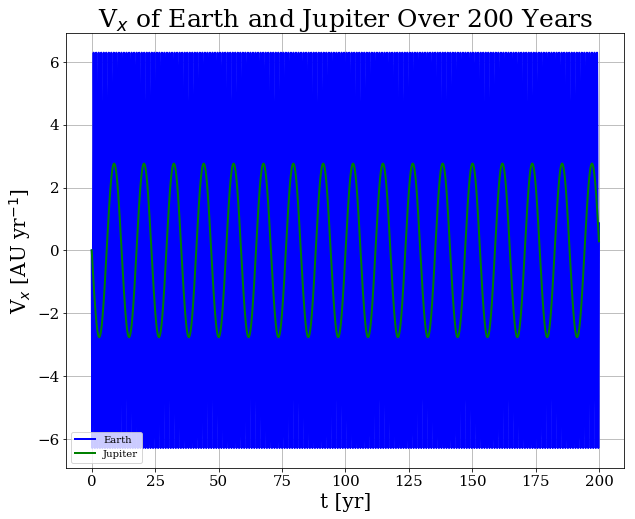

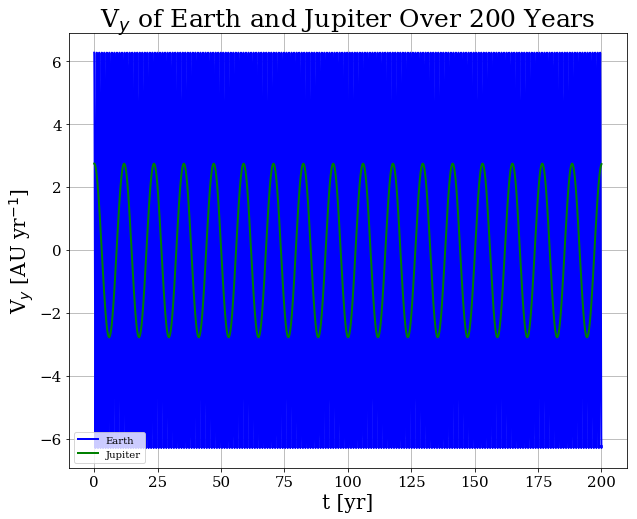

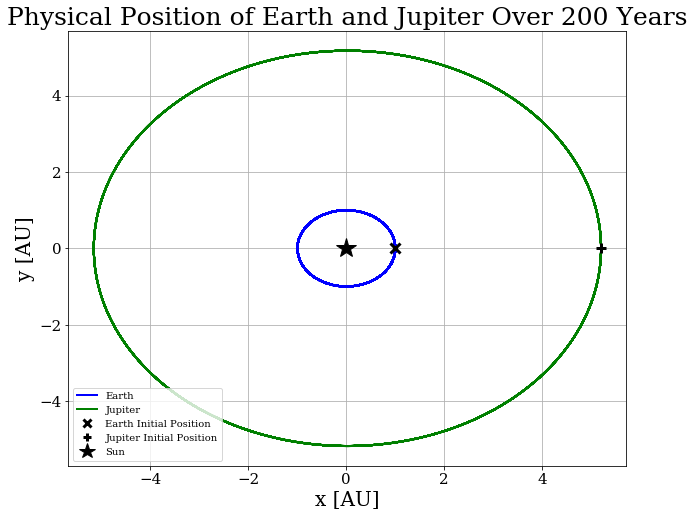

In [200]:
#Integrate Earth and Jupiter orbit over 200 years
a_ej = 0                   #Initial time
b_ej = 200                 #Final time
dt_ej = 0.001              #Timestep
N_ej = (b_ej-a_ej)/dt_ej   #Number of timesteps

#Put initial conditions into an array
two_planet_ics = np.array((earth_x0, earth_vx0, earth_y0, earth_vy0, jupiter_x0, jupiter_vx0, jupiter_y0, jupiter_vy0))

#Integrate the equations of motion using RK4
t_2planet_200, x_2planet_200 = RK4_array(a_ej, b_ej, N_ej, two_planets, two_planet_ics)

#Plotting vx over 200 years
plt.figure(figsize=(10,8))
plt.title('V$_x$ of Earth and Jupiter Over 200 Years', fontsize=25)
plt.xlabel('t [yr]', fontsize=20)
plt.ylabel('V$_x$ [AU yr$^{-1}$]', fontsize=20)
plt.plot(t_2planet_200,x_2planet_200[:,1], 'b-', linewidth=2, label='Earth')
plt.plot(t_2planet_200, x_2planet_200[:,5], 'g-', linewidth=2, label='Jupiter')
plt.grid()
plt.legend(markerscale=0.8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('ej_vx_200yr.pdf', bbox_inches='tight')
plt.show()

#Plotting vy over 200 years
plt.figure(figsize=(10,8))
plt.title('V$_y$ of Earth and Jupiter Over 200 Years', fontsize=25)
plt.xlabel('t [yr]', fontsize=20)
plt.ylabel('V$_y$ [AU yr$^{-1}$]', fontsize=20)
plt.plot(t_2planet_200,x_2planet_200[:,3], 'b-', linewidth=2, label='Earth')
plt.plot(t_2planet_200, x_2planet_200[:,7], 'g-', linewidth=2, label='Jupiter')
plt.grid()
plt.legend(markerscale=0.8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('ej_vy_200yr.pdf', bbox_inches='tight')
plt.show()

#Plotting the position of Earth and Jupiter over 200 years
plt.figure(figsize=(10,8))
plt.title('Physical Position of Earth and Jupiter Over 200 Years', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.plot(x_2planet_200[:,0], x_2planet_200[:,2], 'b-', linewidth=2, label='Earth')
plt.plot(x_2planet_200[:,4], x_2planet_200[:,6], 'g-', linewidth=2, label='Jupiter')
plt.plot(earth_x0, earth_y0, 'kx', markeredgewidth=3, markersize=10, label='Earth Initial Position')
plt.plot(jupiter_x0, jupiter_y0, 'k+', markeredgewidth=3, markersize=10, label='Jupiter Initial Position')
plt.plot(0, 0, 'k*', markeredgewidth=1, markersize=20, label='Sun')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(markerscale=0.8)
plt.savefig('ej_pos_200yr.pdf', bbox_inches='tight')
plt.show()

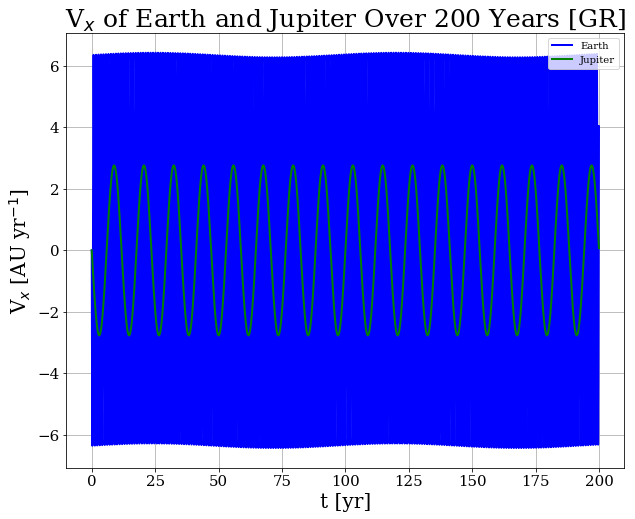

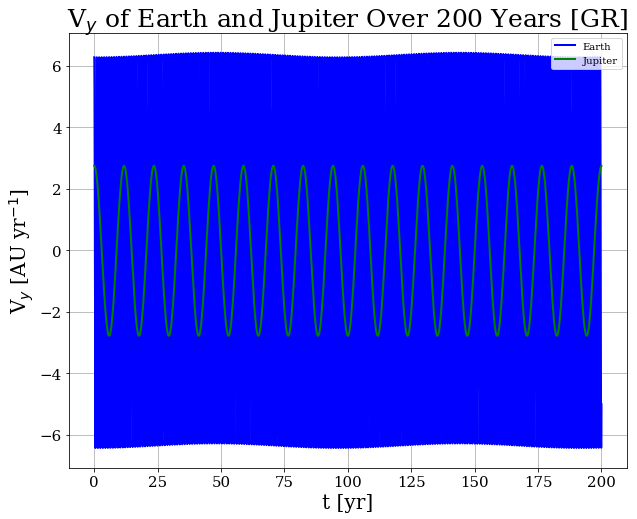

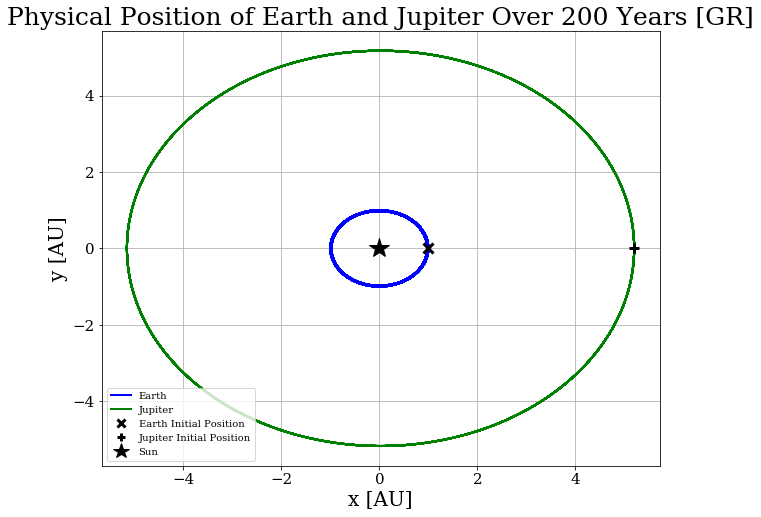

In [201]:
#Earth and Jupiter orbit over 200 years with GR
#Put initial conditions into an array
two_planet_ics = np.array((earth_x0, earth_vx0, earth_y0, earth_vy0, jupiter_x0, jupiter_vx0, jupiter_y0, jupiter_vy0))

#Integrate the equations of motion using RK4
t_2planet_200_GR1, x_2planet_200_GR1 = RK4_array(a_ej, b_ej, N_ej, two_planets_GR1, two_planet_ics)

#Plotting vx over 200 years
plt.figure(figsize=(10,8))
plt.title('V$_x$ of Earth and Jupiter Over 200 Years [GR]', fontsize=25)
plt.xlabel('t [yr]', fontsize=20)
plt.ylabel('V$_x$ [AU yr$^{-1}$]', fontsize=20)
plt.plot(t_2planet_200_GR1,x_2planet_200_GR1[:,1], 'b-', linewidth=2, label='Earth')
plt.plot(t_2planet_200_GR1, x_2planet_200_GR1[:,5], 'g-', linewidth=2, label='Jupiter')
plt.grid()
plt.legend(markerscale=0.8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('ej_vx_200yr_gr.pdf', bbox_inches='tight')
plt.show()

#Plotting vy over 200 years
plt.figure(figsize=(10,8))
plt.title('V$_y$ of Earth and Jupiter Over 200 Years [GR]', fontsize=25)
plt.xlabel('t [yr]', fontsize=20)
plt.ylabel('V$_y$ [AU yr$^{-1}$]', fontsize=20)
plt.plot(t_2planet_200_GR1,x_2planet_200_GR1[:,3], 'b-', linewidth=2, label='Earth')
plt.plot(t_2planet_200_GR1, x_2planet_200_GR1[:,7], 'g-', linewidth=2, label='Jupiter')
plt.grid()
plt.legend(markerscale=0.8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('ej_vy_200yr_gr.pdf', bbox_inches='tight')
plt.show()

#Plotting the position of Earth and Jupiter over 200 years
plt.figure(figsize=(10,8))
plt.title('Physical Position of Earth and Jupiter Over 200 Years [GR]', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.plot(x_2planet_200_GR1[:,0], x_2planet_200_GR1[:,2], 'b-', linewidth=2, label='Earth')
plt.plot(x_2planet_200_GR1[:,4], x_2planet_200_GR1[:,6], 'g-', linewidth=2, label='Jupiter')
plt.plot(earth_x0, earth_y0, 'kx', markeredgewidth=3, markersize=10, label='Earth Initial Position')
plt.plot(jupiter_x0, jupiter_y0, 'k+', markeredgewidth=3, markersize=10, label='Jupiter Initial Position')
plt.plot(0, 0, 'k*', markeredgewidth=1, markersize=20, label='Sun')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(markerscale=0.8)
plt.savefig('ej_pos_200yr_gr.pdf', bbox_inches='tight')
plt.show()

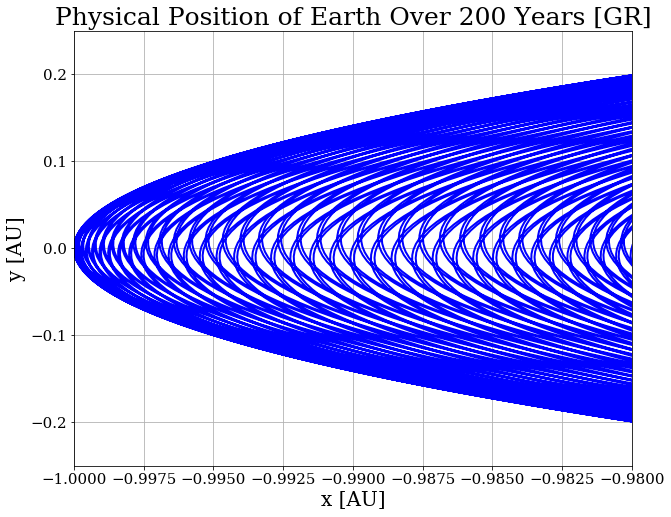

In [202]:
#Plotting the position of Earth over 200 years - zoomed in
plt.figure(figsize=(10,8))
plt.title('Physical Position of Earth Over 200 Years [GR]', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.xlim(-1,-0.98)
plt.ylim(-0.25, 0.25)
plt.plot(x_2planet_200_GR1[:,0], x_2planet_200_GR1[:,2], 'b-', linewidth=2, label='Earth')
plt.plot(0, 0, 'k*', markeredgewidth=1, markersize=20, label='Sun')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('earth_gr_200yr_zoom.pdf', bbox_inches='tight')
plt.show()

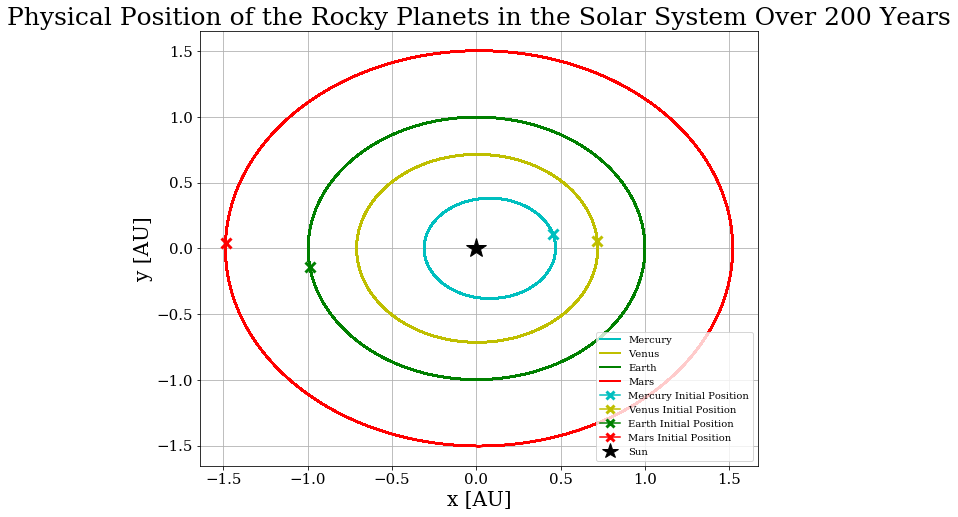

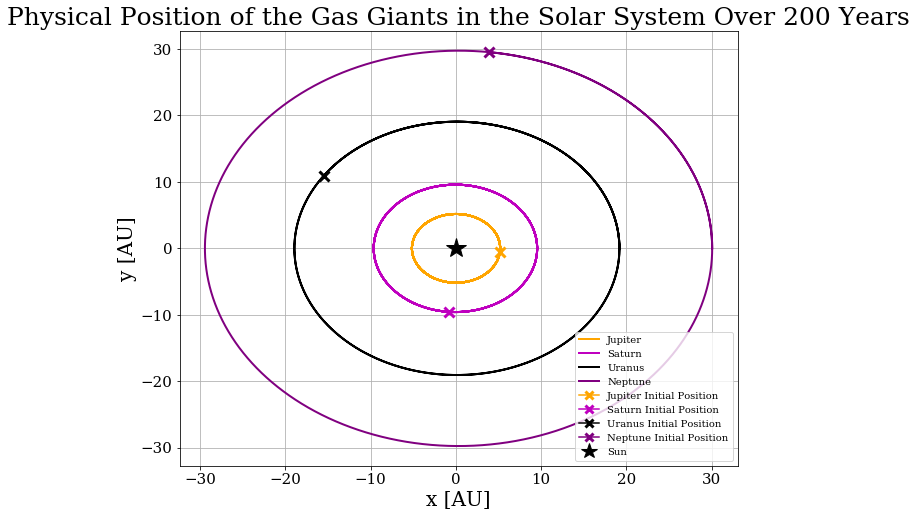

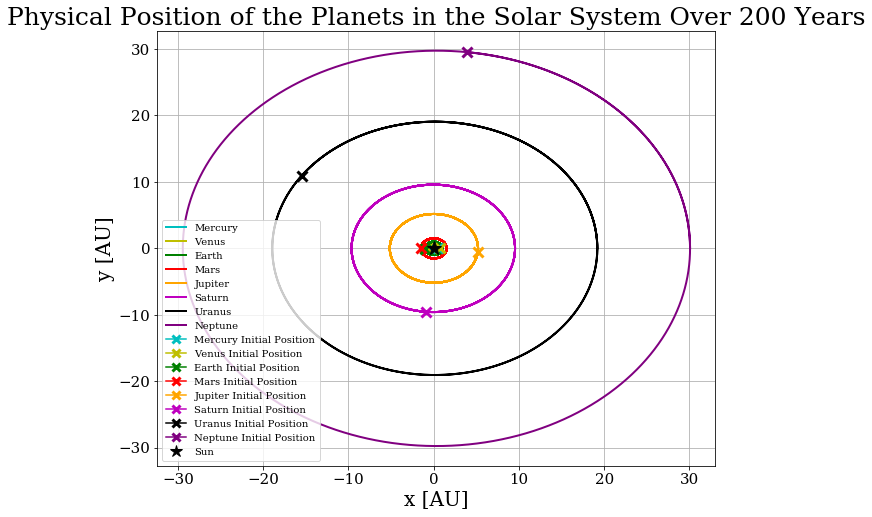

In [150]:
#Calculate the orbits of all of the planets in the solar system
#Define a function for the equations of motion
def solar_system(r,t): 
    #Initial conditions
    x1 = r[0]
    vx1 = r[1]
    y1 = r[2]
    vy1 = r[3]
    x2 = r[4]
    vx2 = r[5]
    y2 = r[6]
    vy2 = r[7]
    x3 = r[8]
    vx3 = r[9]
    y3 = r[10]
    vy3 = r[11]
    x4 = r[12]
    vx4 = r[13]
    y4 = r[14]
    vy4 = r[15]
    x5 = r[16]
    vx5 = r[17]
    y5 = r[18]
    vy5 = r[19]
    x6 = r[20]
    vx6 = r[21]
    y6 = r[22]
    vy6 = r[23]
    x7 = r[24]
    vx7 = r[25]
    y7 = r[26]
    vy7 = r[27]
    x8 = r[28]
    vx8 = r[29]
    y8 = r[30]
    vy8 = r[31]
    
    #Semi-major axes
    d1 = np.sqrt(x1**2 + y1**2)
    d2 = np.sqrt(x2**2 + y2**2)
    d3 = np.sqrt(x3**2 + y3**2)
    d4 = np.sqrt(x4**2 + y4**2)
    d5 = np.sqrt(x5**2 + y5**2)
    d6 = np.sqrt(x6**2 + y6**2)
    d7 = np.sqrt(x7**2 + y7**2)
    d8 = np.sqrt(x8**2 + y8**2)
    
    #Equations of motion
    fx1 = vx1
    fvx1 = -(G*M_sun*x1)/(d1**3)
    fy1 = vy1
    fvy1 = -(G*M_sun*y1)/(d1**3)
    fx2 = vx2
    fvx2 = -(G*M_sun*x2)/(d2**3)
    fy2 = vy2
    fvy2 = -(G*M_sun*y2)/(d2**3)
    fx3 = vx3
    fvx3 = -(G*M_sun*x3)/(d3**3)
    fy3 = vy3
    fvy3 = -(G*M_sun*y3)/(d3**3)
    fx4 = vx4
    fvx4 = -(G*M_sun*x4)/(d4**3)
    fy4 = vy4
    fvy4 = -(G*M_sun*y4)/(d4**3)
    fx5 = vx5
    fvx5 = -(G*M_sun*x5)/(d5**3)
    fy5 = vy5
    fvy5 = -(G*M_sun*y5)/(d5**3)
    fx6 = vx6
    fvx6 = -(G*M_sun*x6)/(d6**3)
    fy6 = vy6
    fvy6 = -(G*M_sun*y6)/(d6**3)
    fx7 = vx7
    fvx7 = -(G*M_sun*x7)/(d7**3)
    fy7 = vy7
    fvy7 = -(G*M_sun*y7)/(d7**3)
    fx8 = vx8
    fvx8 = -(G*M_sun*x8)/(d8**3)
    fy8 = vy8
    fvy8 = -(G*M_sun*y8)/(d8**3)
    return np.array([fx1, fvx1, fy1, fvy1, fx2, fvx2, fy2, fvy2, fx3, fvx3, fy3, fvy3, fx4, fvx4, fy4, fvy4,
                    fx5, fvx5, fy5, fvy5, fx6, fvx6, fy6, fvy6, fx7, fvx7, fy7, fvy7, fx8, fvx8, fy8, fvy8], float)

#Define initial conditions for each planet
#Mercury
mercury_x0 = 0.47   #[AU]
mercury_y0 = 0      #[AU]
mercury_vx0 = 0     #[AU/yr]
mercury_vy0 = 8.17  #[AU/yr]

#Venus
venus_x0 = 0.72     #[AU]
venus_y0 = 0        #[AU]
venus_vx0 = 0       #[AU/yr]
venus_vy0 = 7.38    #[AU/yr]

#Earth
earth_x0 = 1        #[AU]
earth_y0 = 0        #[AU]
earth_vx0 = 0       #[AU/yr]
earth_vy0 = 6.28    #[AU/yr]

#Mars
mars_x0 = 1.52      #[AU]
mars_y0 = 0         #[AU]
mars_vx0 = 0        #[AU/yr]
mars_vy0 = 5.07     #[AU/yr]

#Jupiter
jupiter_x0 = 5.2    #[AU]
jupiter_y0 = 0      #[AU]
jupiter_vx0 = 0     #[AU/yr]
jupiter_vy0 = 2.75  #[AU/yr]

#Saturn
saturn_x0 = 9.54    #[AU]
saturn_y0 = 0       #[AU]
saturn_vx0 = 0      #[AU/yr]
saturn_vy0 = 2.04   #[AU/yr]

#Uranus
uranus_x0 = 19.19   #[AU]
uranus_y0 = 0       #[AU]
uranus_vx0 = 0      #[AU/yr]
uranus_vy0 = 1.43   #[AU/yr]

#Neptune
neptune_x0 = 30.07  #[AU]
neptune_y0 = 0      #[AU]
neptune_vx0 = 0     #[AU/yr]
neptune_vy0 = 1.14  #[AU/yr]

#Create an array for all of the initial conditions
solar_system_ics = np.array((mercury_x0, mercury_vx0, mercury_y0, mercury_vy0, venus_x0, venus_vx0, venus_y0, 
                             venus_vy0, earth_x0, earth_vx0, earth_y0, earth_vy0, mars_x0, mars_vx0, mars_y0, mars_vy0,
                             jupiter_x0, jupiter_vx0, jupiter_y0, jupiter_vy0, saturn_x0, saturn_vx0, saturn_y0, 
                            saturn_vy0, uranus_x0, uranus_vx0, uranus_y0, uranus_vy0, neptune_x0, neptune_vx0, 
                            neptune_y0, neptune_vy0))

#Integrate the equations of motion using RK4
t_solar_system, x_solar_system = RK4_array(a_ej, b_ej, N_ej, solar_system, solar_system_ics)

#Plot the orbits of the rocky planets
plt.figure(figsize=(10,8))
plt.title('Physical Position of the Rocky Planets in the Solar System Over 200 Years', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.plot(x_solar_system[:,0], x_solar_system[:,2], 'c-', linewidth=2, label='Mercury')
plt.plot(x_solar_system[:,4], x_solar_system[:,6], 'y-', linewidth=2, label='Venus')
plt.plot(x_solar_system[:,8], x_solar_system[:,10], 'g-', linewidth=2, label='Earth')
plt.plot(x_solar_system[:,12], x_solar_system[:,14], 'r-', linewidth=2, label='Mars')
plt.plot(solar_system_ics[0], solar_system_ics[2], color='c', marker='x', markeredgewidth=3, markersize=10, label='Mercury Initial Position')
plt.plot(solar_system_ics[4], solar_system_ics[6], color='y', marker='x', markeredgewidth=3, markersize=10, label='Venus Initial Position')
plt.plot(solar_system_ics[8], solar_system_ics[10], color='g', marker='x', markeredgewidth=3, markersize=10, label='Earth Initial Position')
plt.plot(solar_system_ics[12], solar_system_ics[14], color='r', marker='x', markeredgewidth=3, markersize=10, label='Mars Initial Position')
plt.plot(0, 0, 'k*', markeredgewidth=1, markersize=20, label='Sun')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(markerscale=0.8)
plt.savefig('rocky_pos.pdf', bbox_inches='tight')
plt.show()

#Plotting orbits of the gas giants
plt.figure(figsize=(10,8))
plt.title('Physical Position of the Gas Giants in the Solar System Over 200 Years', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.plot(x_solar_system[:,16], x_solar_system[:,18], color='orange', linewidth=2, label='Jupiter')
plt.plot(x_solar_system[:,20], x_solar_system[:,22], 'm-', linewidth=2, label='Saturn')
plt.plot(x_solar_system[:,24], x_solar_system[:,26], 'k-', linewidth=2, label='Uranus')
plt.plot(x_solar_system[:,28], x_solar_system[:,30], color='purple', linewidth=2, label='Neptune')
plt.plot(solar_system_ics[16], solar_system_ics[18], color='orange', marker='x', markeredgewidth=3, markersize=10, label='Jupiter Initial Position')
plt.plot(solar_system_ics[20], solar_system_ics[22], color='m', marker='x', markeredgewidth=3, markersize=10, label='Saturn Initial Position')
plt.plot(solar_system_ics[24], solar_system_ics[26], color='k', marker='x', markeredgewidth=3, markersize=10, label='Uranus Initial Position')
plt.plot(solar_system_ics[28], solar_system_ics[30], color='purple', marker='x', markeredgewidth=3, markersize=10, label='Neptune Initial Position')
plt.plot(0, 0, 'k*', markeredgewidth=1, markersize=20, label='Sun')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(markerscale=0.8)
plt.savefig('gas_pos.pdf', bbox_inches='tight')
plt.show()

#Plotting all planets
plt.figure(figsize=(10,8))
plt.title('Physical Position of the Planets in the Solar System Over 200 Years', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.plot(x_solar_system[:,0], x_solar_system[:,2], 'c-', linewidth=2, label='Mercury')
plt.plot(x_solar_system[:,4], x_solar_system[:,6], 'y-', linewidth=2, label='Venus')
plt.plot(x_solar_system[:,8], x_solar_system[:,10], 'g-', linewidth=2, label='Earth')
plt.plot(x_solar_system[:,12], x_solar_system[:,14], 'r-', linewidth=2, label='Mars')
plt.plot(x_solar_system[:,16], x_solar_system[:,18], color='orange', linewidth=2, label='Jupiter')
plt.plot(x_solar_system[:,20], x_solar_system[:,22], 'm-', linewidth=2, label='Saturn')
plt.plot(x_solar_system[:,24], x_solar_system[:,26], 'k-', linewidth=2, label='Uranus')
plt.plot(x_solar_system[:,28], x_solar_system[:,30], color='purple', linewidth=2, label='Neptune')
plt.plot(solar_system_ics[0], solar_system_ics[2], color='c', marker='x', markeredgewidth=3, markersize=10, label='Mercury Initial Position')
plt.plot(solar_system_ics[4], solar_system_ics[6], color='y', marker='x', markeredgewidth=3, markersize=10, label='Venus Initial Position')
plt.plot(solar_system_ics[8], solar_system_ics[10], color='g', marker='x', markeredgewidth=3, markersize=10, label='Earth Initial Position')
plt.plot(solar_system_ics[12], solar_system_ics[14], color='r', marker='x', markeredgewidth=3, markersize=10, label='Mars Initial Position')
plt.plot(solar_system_ics[16], solar_system_ics[18], color='orange', marker='x', markeredgewidth=3, markersize=10, label='Jupiter Initial Position')
plt.plot(solar_system_ics[20], solar_system_ics[22], color='m', marker='x', markeredgewidth=3, markersize=10, label='Saturn Initial Position')
plt.plot(solar_system_ics[24], solar_system_ics[26], color='k', marker='x', markeredgewidth=3, markersize=10, label='Uranus Initial Position')
plt.plot(solar_system_ics[28], solar_system_ics[30], color='purple', marker='x', markeredgewidth=3, markersize=10, label='Neptune Initial Position')
plt.plot(0, 0, 'k*', markeredgewidth=1, markersize=15, label='Sun')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(markerscale=0.8)
plt.savefig('all_planets_pos.pdf', bbox_inches='tight')
plt.show()

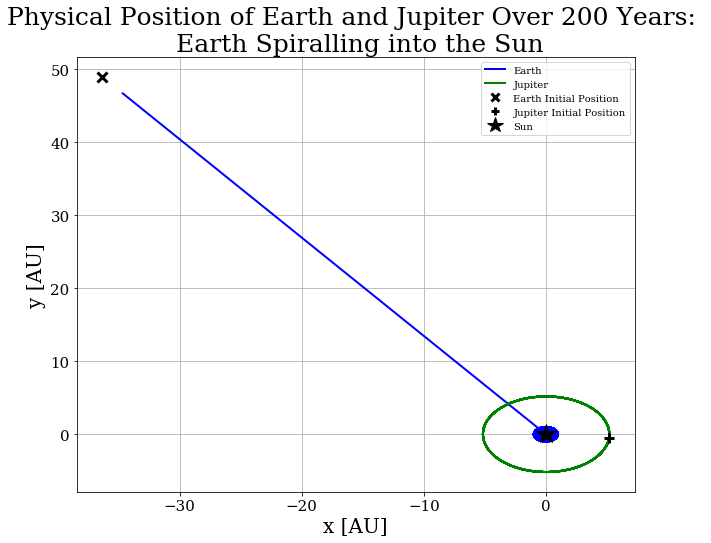

In [203]:
#Show how RK4 fails: Earth spirals into the Sun
dt_fail = 0.05                #Larger timestep
N_fail = (b_ej-a_ej)/dt_fail  #Number of timesteps

#Put initial conditions into an array
two_planet_ics = np.array((earth_x0, earth_vx0, earth_y0, earth_vy0, jupiter_x0, jupiter_vx0, jupiter_y0, jupiter_vy0))

#Integrate the equations of motion using RK4
t_fail, x_fail = RK4_array(a_ej, b_ej, N_fail, two_planets, two_planet_ics)

#Plotting the position of Earth and Jupiter over 200 years
plt.figure(figsize=(10,8))
plt.title('Physical Position of Earth and Jupiter Over 200 Years: \n Earth Spiralling into the Sun', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.plot(x_fail[:,0], x_fail[:,2], 'b-', linewidth=2, label='Earth')
plt.plot(x_fail[:,4], x_fail[:,6], 'g-', linewidth=2, label='Jupiter')
plt.plot(two_planet_ics[0], two_planet_ics[2], 'kx', markeredgewidth=3, markersize=10, label='Earth Initial Position')
plt.plot(two_planet_ics[4], two_planet_ics[6], 'k+', markeredgewidth=3, markersize=10, label='Jupiter Initial Position')
plt.plot(0, 0, 'k*', markeredgewidth=1, markersize=20, label='Sun')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(markerscale=0.8)
plt.savefig('fail_spiral.pdf', bbox_inches='tight')
plt.show()

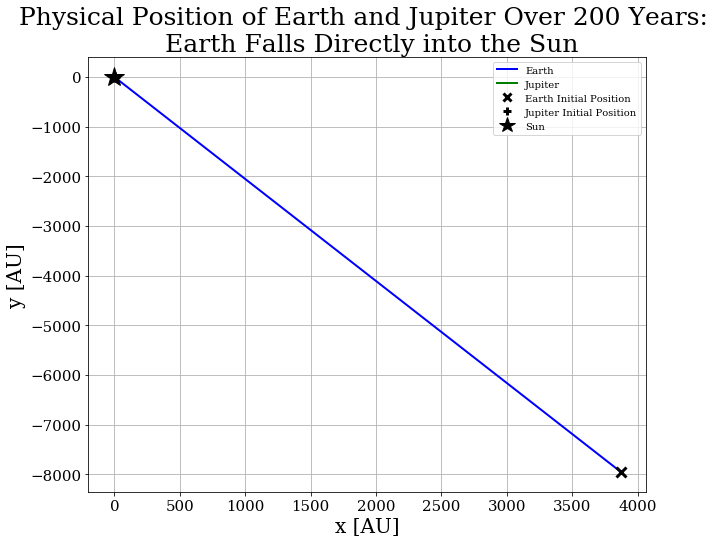

In [204]:
#Show how RK4 fails: Earth falls directly into the Sun
dt_fail2 = 0.1                 #Even larger timestep
N_fail2 = (b_ej-a_ej)/dt_fail2 #Number of timesteps

#Put initial conditions into an array
two_planet_ics = np.array((earth_x0, earth_vx0, earth_y0, earth_vy0, jupiter_x0, jupiter_vx0, jupiter_y0, jupiter_vy0))

#Integrate the equations of motion using RK4
t_fail2, x_fail2 = RK4_array(a_ej, b_ej, N_fail2, two_planets, two_planet_ics)

#Plotting the position of Earth and Jupiter over 200 years
plt.figure(figsize=(10,8))
plt.title('Physical Position of Earth and Jupiter Over 200 Years: \n Earth Falls Directly into the Sun', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.plot(x_fail2[:,0], x_fail2[:,2], 'b-', linewidth=2, label='Earth')
plt.plot(x_fail2[:,4], x_fail2[:,6], 'g-', linewidth=2, label='Jupiter')
plt.plot(two_planet_ics[0], two_planet_ics[2], 'kx', markeredgewidth=3, markersize=10, label='Earth Initial Position')
plt.plot(two_planet_ics[4], two_planet_ics[6], 'k+', markeredgewidth=3, markersize=10, label='Jupiter Initial Position')
plt.plot(0, 0, 'k*', markeredgewidth=1, markersize=20, label='Sun')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(markerscale=0.8)
plt.savefig('fail_fall.pdf', bbox_inches='tight')
plt.show()

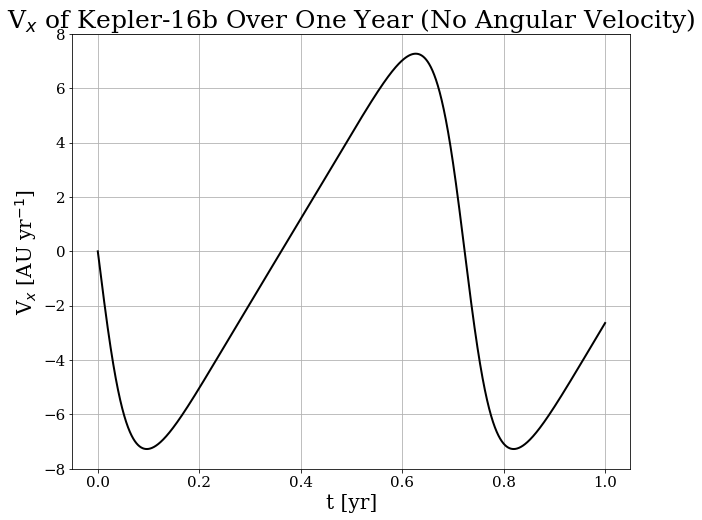

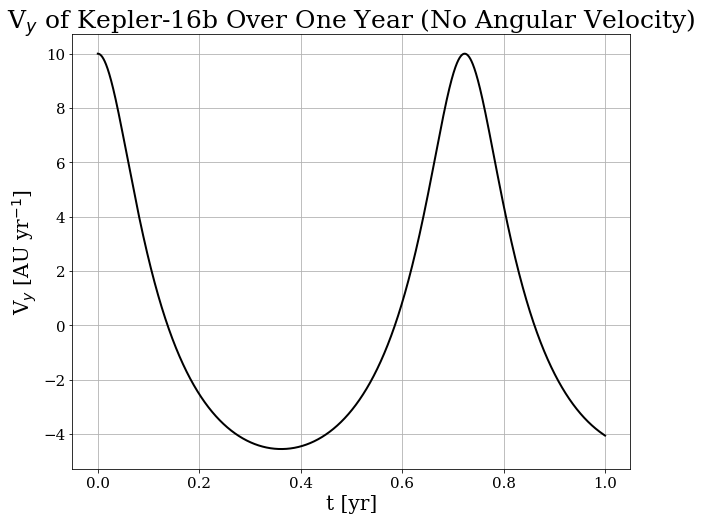

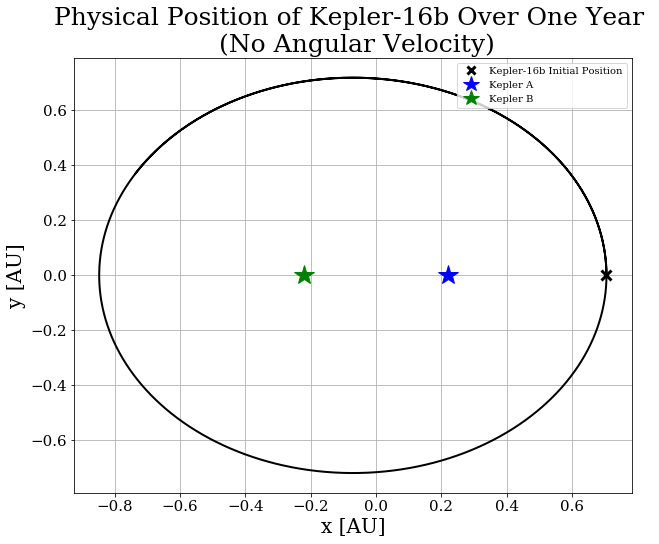

In [194]:
#Restricted 3-body problem in the xy-plane
x1 = 0.22      #x-position of 1st massive body (Kepler A) [AU]
y1 = 0         #y-position of 1st massive body (Kepler A) [AU]
x2 = 0.22      #x-position of 2nd massive body (Kepler B) [AU]
y2 = 0         #y-position of 2nd massive body (Kepler B) [AU]
m1 = 0.69      #Mass of the 1st massive body (Kepler A) [solar masses]
m2 = 0.203     #Mass of the 2nd massive body (Kepler B) [solar masses]
omega_x = 0    #Angular velocity in the x-direction [rad/yr]
omega_y = 0    #Angular velocity in the y-direction [rad/yr]

#Define equations of motion for the Kepler-16 system
def restricted_three_body(r, t):
    #Initial conditions
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]

    #Semi-major axes
    d1 = np.sqrt((x - x1)**2 + (y - y1)**2)
    d2 = np.sqrt((x - x2)**2 + (y - y2)**2)
    
    #Equations of motion
    fx = vx
    fvx = -G*((m1*(x - x1))/d1**3 + (m2*(x - x2))/d2**3) + 2*y*omega_y + y*omega_x*omega_y - x*omega_y**2 
    fy = vy
    fvy = -G*((m1*(y - y1))/d1**3 + (m2*(y - y2))/d2**3) - y*omega_x**2 - x*omega_x*omega_y 
    return np.array([fx, fvx, fy, fvy], float)

#Define initial conditions
x0_3 = 0.705       #x-position of the planet (Kepler-16b) [AU]
y0_3 = 0           #y-position of the planet (Kepler-16b) [AU]
vx0_3 = 0          #x-velocity of the planet (Kepler-16b) [AU/yr]
vy0_3 = 10         #y-velocity of the planet (Kepler-16b) [AU/yr]

#Create array for initial conditions
restricted_3body_ics = np.array((x0_3, vx0_3, y0_3, vy0_3))

#Integrate the equations of motion using RK4
t_3body, x_3body = RK4_array(a, b, N, restricted_three_body, restricted_3body_ics)

#Plotting vx over one year
plt.figure(figsize=(10,8))
plt.title('V$_x$ of Kepler-16b Over One Year (No Angular Velocity)', fontsize=25)
plt.xlabel('t [yr]', fontsize=20)
plt.ylabel('V$_x$ [AU yr$^{-1}$]', fontsize=20)
plt.plot(t_3body,x_3body[:,1], 'k-', linewidth=2)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('kepler_vx_1yr.pdf', bbox_inches='tight')
plt.show()

#Plotting vy over one year
plt.figure(figsize=(10,8))
plt.title('V$_y$ of Kepler-16b Over One Year (No Angular Velocity)', fontsize=25)
plt.xlabel('t [yr]', fontsize=20)
plt.ylabel('V$_y$ [AU yr$^{-1}$]', fontsize=20)
plt.plot(t_3body,x_3body[:,3], 'k-', linewidth=2)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('kepler_vy_1yr.pdf', bbox_inches='tight')
plt.show()

#Plotting the position of Kepler-16b over one year
plt.figure(figsize=(10,8))
plt.title('Physical Position of Kepler-16b Over One Year \n (No Angular Velocity)', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.plot(x_3body[:,0], x_3body[:,2], 'k-', linewidth=2)
plt.plot(x0_3, y0_3, 'kx', markeredgewidth=3, markersize=10, label='Kepler-16b Initial Position')
plt.plot(x1, y1, 'b*', markeredgewidth=1, markersize=20, label='Kepler A')
plt.plot(-x1, y1, 'g*', markeredgewidth=1, markersize=20, label='Kepler B')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(markerscale=0.8, loc='upper right')
plt.savefig('kepler_pos_1yr.pdf', bbox_inches='tight')
plt.show()

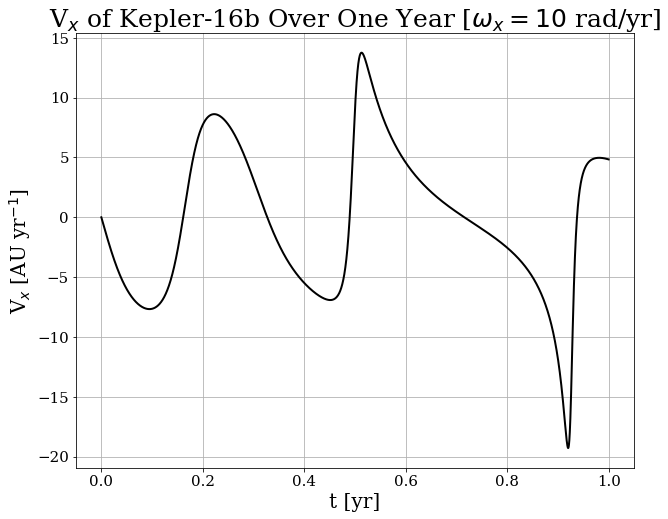

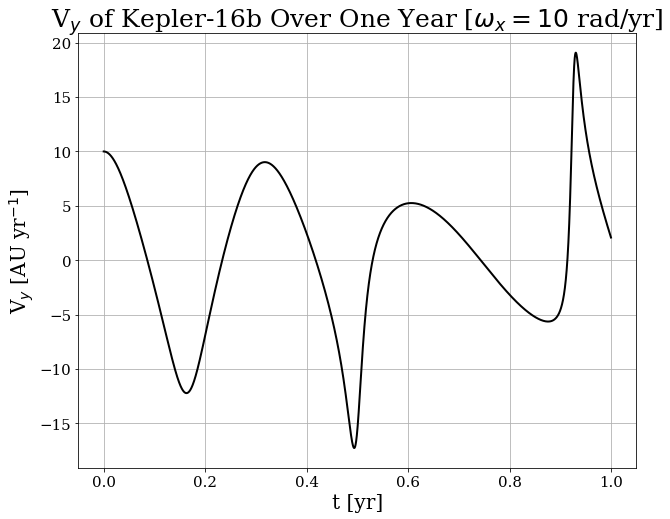

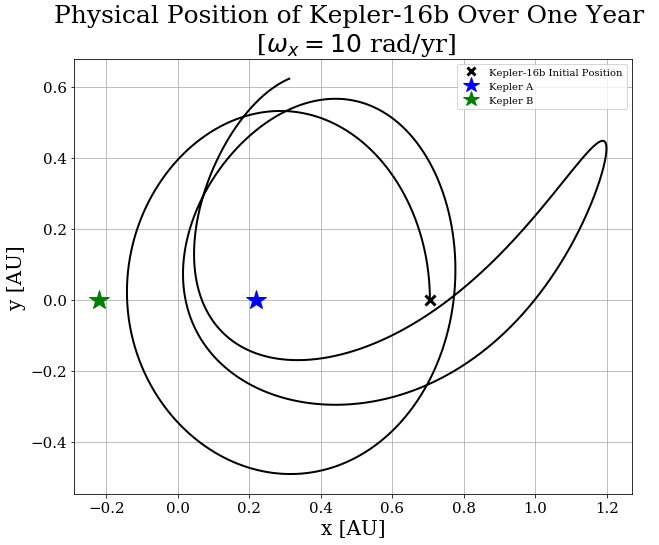

In [197]:
#Add the angular velocity of the system
omega_x = 10     #[rad/yr]
omega_y = 0      #[rad/yr]

#Create array for initial conditions
restricted_3body_ics = np.array((x0_3, vx0_3, y0_3, vy0_3))

#Integrate the equations of motion
t_3body_ang, x_3body_ang = RK4_array(a, b, N, restricted_three_body, restricted_3body_ics)

#Plotting vx over one year
plt.figure(figsize=(10,8))
plt.title('V$_x$ of Kepler-16b Over One Year [$\omega_{x} = 10$ rad/yr]', fontsize=25)
plt.xlabel('t [yr]', fontsize=20)
plt.ylabel('V$_x$ [AU yr$^{-1}$]', fontsize=20)
plt.plot(t_3body_ang, x_3body_ang[:,1], 'k-', linewidth=2)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('kepler_vx_angvel.pdf', bbox_inches='tight')
plt.show()

#Plotting vy over one year
plt.figure(figsize=(10,8))
plt.title('V$_y$ of Kepler-16b Over One Year [$\omega_{x} = 10$ rad/yr]', fontsize=25)
plt.xlabel('t [yr]', fontsize=20)
plt.ylabel('V$_y$ [AU yr$^{-1}$]', fontsize=20)
plt.plot(t_3body_ang, x_3body_ang[:,3], 'k-', linewidth=2)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('kepler_vy_angvel.pdf', bbox_inches='tight')
plt.show()

#Plotting the position of Kepler-16b over one year
plt.figure(figsize=(10,8))
plt.title('Physical Position of Kepler-16b Over One Year \n [$\omega_{x} = 10$ rad/yr]', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.plot(x_3body_ang[:,0], x_3body_ang[:,2], 'k-', linewidth=2)
plt.plot(x0_3, y0_3, 'kx', markeredgewidth=3, markersize=10, label='Kepler-16b Initial Position')
plt.plot(x1, y1, 'b*', markeredgewidth=1, markersize=20, label='Kepler A')
plt.plot(-x1, y1, 'g*', markeredgewidth=1, markersize=20, label='Kepler B')
plt.grid()
plt.legend(markerscale=0.8, loc='upper right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('kepler_pos_angvel.pdf', bbox_inches='tight')
plt.show()

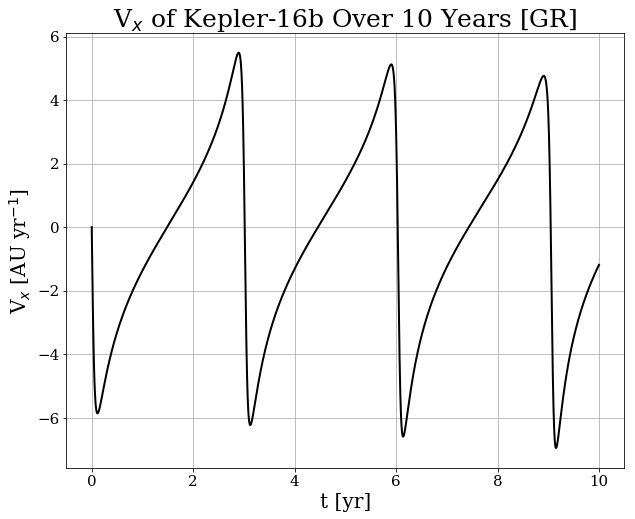

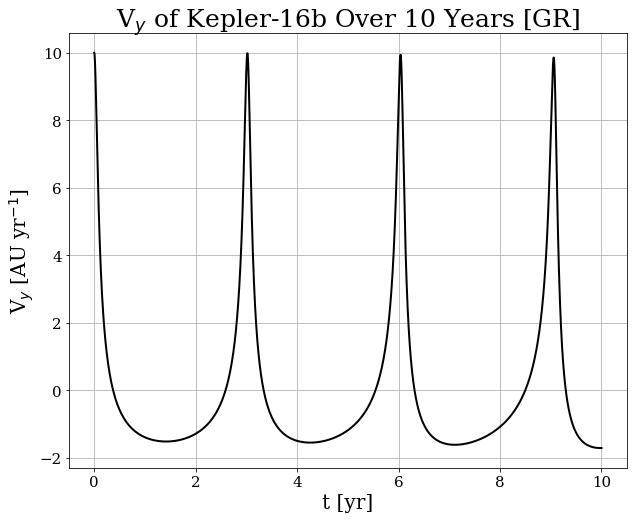

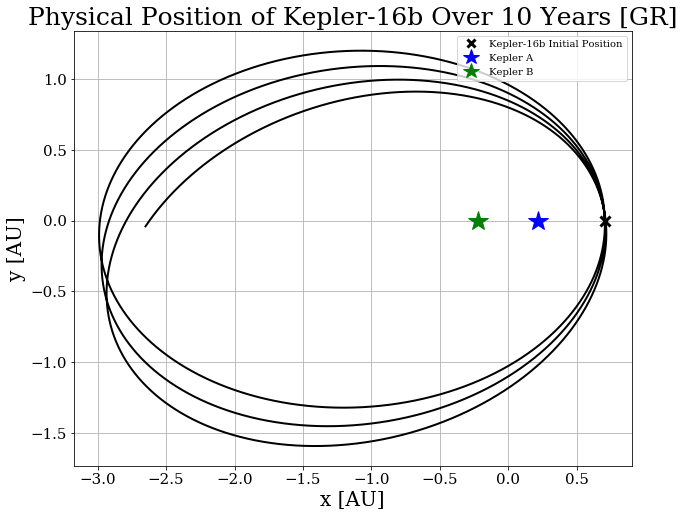

In [206]:
#Restricted 3-body problem with GR
omega_x = 0  #[rad/yr]
omega_y = 0  #[rad/yr]

#Define function for equations of motion
def restricted_three_body_GR(r, t):
    #Initial conditions
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    
    #Semi-major axes
    d1 = np.sqrt((x - x1)**2 + (y - y1)**2)
    d2 = np.sqrt((x - x2)**2 + (y - y2)**2)
    
    #Equations of motion
    fx = vx
    fvx = -(G*((m1*(x - x1))/d1**3)*(1 + (alpha/d1**2)) + (m2*(x - x2))/d2**3) + 2*y*omega_y + y*omega_x*omega_y - x*omega_y**2 
    fy = vy
    fvy = -(G*((m1*(y - y1))/d1**3)*(1 + (alpha/d2**2)) + (m2*(y - y2))/d2**3) - y*omega_x**2 - x*omega_x*omega_y 
    return np.array([fx, fvx, fy, fvy], float)

a_restricted_GR = 0                                      #Initial time [yr]
b_restricted_GR = 10                                     #Final time [yr]
N_restricted_GR = (b_restricted_GR-a_restricted_GR)/dt   #Number of timesteps

#Create array for initial conditions
restricted_3body_ics = np.array((x0_3, vx0_3, y0_3, vy0_3))

#Integrate the equations of motion using RK4
t_3body_GR, x_3body_GR = RK4_array(a_restricted_GR, b_restricted_GR, N_restricted_GR, restricted_three_body_GR, restricted_3body_ics)

#Plotting vx over 10 years
plt.figure(figsize=(10,8))
plt.title('V$_x$ of Kepler-16b Over 10 Years [GR]', fontsize=25)
plt.xlabel('t [yr]', fontsize=20)
plt.ylabel('V$_x$ [AU yr$^{-1}$]', fontsize=20)
plt.plot(t_3body_GR, x_3body_GR[:,1], 'k-', linewidth=2)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('kepler_vx_gr.pdf', bbox_inches='tight')
plt.show()

#Plotting vy over 10 years
plt.figure(figsize=(10,8))
plt.title('V$_y$ of Kepler-16b Over 10 Years [GR]', fontsize=25)
plt.xlabel('t [yr]', fontsize=20)
plt.ylabel('V$_y$ [AU yr$^{-1}$]', fontsize=20)
plt.plot(t_3body_GR, x_3body_GR[:,3], 'k-', linewidth=2)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('kepler_vy_gr.pdf', bbox_inches='tight')
plt.show()

#Plotting the position of Kepler-16b over 10 years
plt.figure(figsize=(10,8))
plt.title('Physical Position of Kepler-16b Over 10 Years [GR]', fontsize=25)
plt.xlabel('x [AU]', fontsize=20)
plt.ylabel('y [AU]', fontsize=20)
plt.plot(x_3body_GR[:,0], x_3body_GR[:,2], 'k-', linewidth=2)
plt.plot(x0_3, y0_3, 'kx', markeredgewidth=3, markersize=10, label='Kepler-16b Initial Position')
plt.plot(x1, y1, 'b*', markeredgewidth=1, markersize=20, label='Kepler A')
plt.plot(-x1, y1, 'g*', markeredgewidth=1, markersize=20, label='Kepler B')
plt.grid()
plt.legend(markerscale=0.8, loc='upper right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('kepler_pos_gr.pdf', bbox_inches='tight')
plt.show()